<a href="https://colab.research.google.com/github/liskibruh/EDA-on-Average-Temperatures-in-Cities-of-Pakistan/blob/main/Copy_of_clean_n_merge_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import lxml

In [6]:
#reading data extracted from the url into dataframe
hecjournals=pd.read_csv("hecjournals.csv")
hecjournals_copy=hecjournals.copy()
hecjournals_copy2=hecjournals.copy()
hecjournals.head()

,Journal name,Author,Publisher,ISSN,Country,Category,Sub Category,JPI,Category value,Medallion,Subject Area Positon,id,url
0,Poetics,NaN,Elsevier,0304-422X,Netherlands,"Social Sciences, Arts and Humanities","Communication,Cultural Studies,Linguistics and...",77,W,Gold,420 / 6542,882494,https://hjrs.hec.gov.pk/index.php?r=site%2Fres...
1,English for Specific Purposes,NaN,Elsevier BV,0889-4906,United Kingdom,"Social Sciences, Arts and Humanities","Education,Linguistics and Language,Language an...",81,W,Platinum,287 / 6542,880485,https://hjrs.hec.gov.pk/index.php?r=site%2Fres...
2,Language,NaN,Linguistic Society of America,"1535-0665,0097-8507",United States,"Arts and Humanities, Social Sciences","Language and Linguistics,Linguistics and Language",90,W,Platinum,76 / 4151,880907,https://hjrs.hec.gov.pk/index.php?r=site%2Fres...
3,Television and New Media,NaN,SAGE Publications Inc.,1527-4764,United States,"Social Sciences, Arts and Humanities","Cultural Studies,Visual Arts and Performing Arts",81,W,Platinum,287 / 6542,880297,https://hjrs.hec.gov.pk/index.php?r=site%2Fres...
4,Language Learning and Technology,NaN,University of Hawaii Press,1094-3501,United States,"Computer Science, Social Sciences, Arts and H...","Computer Science Applications,Education,Lingui...",79,W,Silver,197 / 1598,879280,https://hjrs.hec.gov.pk/index.php?r=site%2Fres...


In [7]:
#reading the dataset that was already given to us.. 
eprint=pd.read_csv("eprint_202112111250.csv")
eprint_copy=eprint.copy()
eprint_copy2=eprint.copy()
eprint

,eprintid,rev_number,eprint_status,userid,importid,source,dir,datestamp_year,datestamp_month,datestamp_day,datestamp_hour,datestamp_minute,datestamp_second,lastmod_year,lastmod_month,lastmod_day,lastmod_hour,lastmod_minute,lastmod_second,status_changed_year,status_changed_month,status_changed_day,status_changed_hour,status_changed_minute,status_changed_second,type,succeeds,commentary,metadata_visibility,fileinfo,item_issues_count,sword_depositor,edit_lock_user,edit_lock_since,edit_lock_until,template,title,ispublished,keywords,note,...,monograph_type,pres_type,series,publication,volume,number,article_number,place_of_pub,pagerange,pages,event_title,event_location,event_dates,event_type,patent_applicant,institution,department,thesis_type,thesis_name,refereed,isbn,issn,book_title,edition,referencetext,output_media,num_pieces,composition_type,pedagogic_type,completion_time,task_purpose,learning_level,gscholar_impact,gscholar_cluster,gscholar_datestamp_year,gscholar_datestamp_month,gscholar_datestamp_day,gscholar_datestamp_hour,gscholar_datestamp_minute,gscholar_datestamp_second
0,2,1,inbox,2,NaN,NaN,disk0/00/00/00/02,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,12,4,24,45,2020,2,12,4,24,45,article,NaN,NaN,show,NaN,NaN,NaN,2.0,1.581481e+09,1.581485e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,6,inbox,2,NaN,NaN,disk0/00/00/00/04,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,12,9,19,1,2020,2,12,6,28,6,article,NaN,NaN,show,/style/images/fileicons/text.png;/id/eprint/4/...,NaN,NaN,2.0,1.581499e+09,1.581503e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,1,inbox,7,NaN,NaN,disk0/00/00/00/16,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,12,10,36,50,2020,2,12,10,36,50,article,NaN,NaN,show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Effectiveness of Manual Physical Therapy in Tr...,NaN,NaN,NaN,...,NaN,NaN,NaN,J Liaquat Uni Med Health Sci,15.0,3,NaN,NaN,139-142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,1,inbox,7,NaN,NaN,disk0/00/00/00/17,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,12,10,36,50,2020,2,12,10,36,50,article,NaN,NaN,show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Factors contributing anterior cruciate ligamen...,NaN,NaN,NaN,...,NaN,NaN,NaN,Rawal Medical Journal,42.0,2,NaN,NaN,223-225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,1,inbox,7,NaN,NaN,disk0/00/00/00/18,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,12,10,36,50,2020,2,12,10,36,50,article,NaN,NaN,show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROLE OF ROUTINE PHYSICAL THERAPY WITH AND WITH...,NaN,NaN,NaN,...,NaN,NaN,NaN,International Journal of Rehabilitation Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,1774,1,inbox,220,NaN,NaN,disk0/00/00/17/74,NaN,NaN,NaN,NaN,NaN,NaN,2021,12,8,4,45,49,2021,12,8,4,45,49,conference_item,NaN,NaN,show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy-efficient clustering scheme for multiho...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131-136,NaN,17th IEEE International Multi Topic Conference...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,1775,1,inbox,220,NaN,NaN,disk0/00/00/17/75,NaN,NaN,NaN,NaN,NaN,NaN,2021,12,8,4,45,50,2021,12,8,4,45,50,article,NaN,NaN,show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy Efficient Cl

# Mapping

In [8]:
#renaming column names
eprint_copy.rename({'title': 'TitleSetA'},axis=1, inplace=True)
hecjournals_copy.rename({'Journal name':'TitleSetB'}, axis=1, inplace=True)
eprint_copy2.rename({'title': 'TitleSetA'},axis=1, inplace=True)
hecjournals_copy2.rename({'Journal name':'TitleSetB'}, axis=1, inplace=True)
eprint.rename({'title': 'TitleSetA'},axis=1, inplace=True)
hecjournals.rename({'Journal name':'TitleSetB'}, axis=1, inplace=True)
eprint_copy

,eprintid,rev_number,eprint_status,userid,importid,source,dir,datestamp_year,datestamp_month,datestamp_day,datestamp_hour,datestamp_minute,datestamp_second,lastmod_year,lastmod_month,lastmod_day,lastmod_hour,lastmod_minute,lastmod_second,status_changed_year,status_changed_month,status_changed_day,status_changed_hour,status_changed_minute,status_changed_second,type,succeeds,commentary,metadata_visibility,fileinfo,item_issues_count,sword_depositor,edit_lock_user,edit_lock_since,edit_lock_until,template,TitleSetA,ispublished,keywords,note,...,monograph_type,pres_type,series,publication,volume,number,article_number,place_of_pub,pagerange,pages,event_title,event_location,event_dates,event_type,patent_applicant,institution,department,thesis_type,thesis_name,refereed,isbn,issn,book_title,edition,referencetext,output_media,num_pieces,composition_type,pedagogic_type,completion_time,task_purpose,learning_level,gscholar_impact,gscholar_cluster,gscholar_datestamp_year,gscholar_datestamp_month,gscholar_datestamp_day,gscholar_datestamp_hour,gscholar_datestamp_minute,gscholar_datestamp_second
0,2,1,inbox,2,NaN,NaN,disk0/00/00/00/02,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,12,4,24,45,2020,2,12,4,24,45,article,NaN,NaN,show,NaN,NaN,NaN,2.0,1.581481e+09,1.581485e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,6,inbox,2,NaN,NaN,disk0/00/00/00/04,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,12,9,19,1,2020,2,12,6,28,6,article,NaN,NaN,show,/style/images/fileicons/text.png;/id/eprint/4/...,NaN,NaN,2.0,1.581499e+09,1.581503e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,1,inbox,7,NaN,NaN,disk0/00/00/00/16,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,12,10,36,50,2020,2,12,10,36,50,article,NaN,NaN,show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Effectiveness of Manual Physical Therapy in Tr...,NaN,NaN,NaN,...,NaN,NaN,NaN,J Liaquat Uni Med Health Sci,15.0,3,NaN,NaN,139-142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,1,inbox,7,NaN,NaN,disk0/00/00/00/17,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,12,10,36,50,2020,2,12,10,36,50,article,NaN,NaN,show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Factors contributing anterior cruciate ligamen...,NaN,NaN,NaN,...,NaN,NaN,NaN,Rawal Medical Journal,42.0,2,NaN,NaN,223-225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,1,inbox,7,NaN,NaN,disk0/00/00/00/18,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,12,10,36,50,2020,2,12,10,36,50,article,NaN,NaN,show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROLE OF ROUTINE PHYSICAL THERAPY WITH AND WITH...,NaN,NaN,NaN,...,NaN,NaN,NaN,International Journal of Rehabilitation Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,1774,1,inbox,220,NaN,NaN,disk0/00/00/17/74,NaN,NaN,NaN,NaN,NaN,NaN,2021,12,8,4,45,49,2021,12,8,4,45,49,conference_item,NaN,NaN,show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy-efficient clustering scheme for multiho...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131-136,NaN,17th IEEE International Multi Topic Conference...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,1775,1,inbox,220,NaN,NaN,disk0/00/00/17/75,NaN,NaN,NaN,NaN,NaN,NaN,2021,12,8,4,45,50,2021,12,8,4,45,50,article,NaN,NaN,show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy Efficien

In [9]:
#mapping

s1 = eprint_copy2.TitleSetA.replace(hecjournals_copy2['TitleSetB'])
#s = hecjournals_copy.Title.replace(eprint_copy.set_index('eprintid')['title'])
#s2 = hecjournals_copy2.TitleSetB.replace(eprint_copy2.set_index('eprintid')['TitleSetA'])
s2 = hecjournals_copy.TitleSetB.replace(eprint_copy['TitleSetA'])

In [10]:
eprint['TitleSetB']=s2
eprint[['TitleSetA', 'TitleSetB']]

,TitleSetA,TitleSetB
0,NaN,Poetics
1,NaN,English for Specific Purposes
2,Effectiveness of Manual Physical Therapy in Tr...,Language
3,Factors contributing anterior cruciate ligamen...,Television and New Media
4,ROLE OF ROUTINE PHYSICAL THERAPY WITH AND WITH...,Language Learning and Technology
...,...,...
717,Energy-efficient clustering scheme for multiho...,Postmedieval
718,Energy Efficient Clustering for Multihop Wirel...,Philosophy Compass
719,SNR maximization through relay selection in co...,Israel Affairs
720,Natural bioactive molecules: An alternative ap...,Philosophy and Technology


In [11]:
hecjournals['TitleSetA']=s1
hecjournals[['TitleSetA', 'TitleSetB']]

,TitleSetA,TitleSetB
0,NaN,Poetics
1,NaN,English for Specific Purposes
2,Effectiveness of Manual Physical Therapy in Tr...,Language
3,Factors contributing anterior cruciate ligamen...,Television and New Media
4,ROLE OF ROUTINE PHYSICAL THERAPY WITH AND WITH...,Language Learning and Technology
...,...,...
5051,NaN,ARTCULTURA-REVISTA DE HISTORIA CULTURA E ARTE
5052,NaN,KWARTALNIK HISTORII ZYDOW-JEWISH HISTORY QUAR...
5053,NaN,PENSAMIENTO Y CULTURA
5054,NaN,JOURNAL FOR THE STUDY OF PAUL AND HIS LETTERS


# Merging

a.	Year wise Plot
b.	Publisher wise Plot
c.	Publication wise Plot
d.	Publication, Year, Subject Plot (Correlations)
e.	Divisions, Year, Publisher Plot 

In [12]:
merged=pd.DataFrame()
merged['Name']=hecjournals['TitleSetA'].append(hecjournals['TitleSetB']).dropna()
merged['Year']=eprint['lastmod_year']
merged['Publisher']=hecjournals['Publisher']
merged['Publication']=eprint['publication']
merged['EPrintID']=eprint['eprintid']
merged.index = pd.RangeIndex(len(merged.index))

In [13]:
merged.isnull().sum().sum()

13158

In [14]:
merged

,Name,Year,Publisher,Publication,EPrintID
0,Effectiveness of Manual Physical Therapy in Tr...,2020.0,Linguistic Society of America,J Liaquat Uni Med Health Sci,16.0
1,Factors contributing anterior cruciate ligamen...,2020.0,SAGE Publications Inc.,Rawal Medical Journal,17.0
2,ROLE OF ROUTINE PHYSICAL THERAPY WITH AND WITH...,2020.0,University of Hawaii Press,International Journal of Rehabilitation Sciences,18.0
3,Clinical Management and Manifestation of Rotat...,2020.0,Elsevier Ltd.,Journal of Riphah College of Rehabilitation Sc...,19.0
4,Impact of Adhesive Capsulitis on Elderly Subje...,2020.0,SAGE Publications Ltd,International Journal of Rehabilitation Scienc...,20.0
...,...,...,...,...,...
5689,ARTCULTURA-REVISTA DE HISTORIA CULTURA E ARTE,NaN,UNIV FEDERAL UBERLANDIA,NaN,NaN
5690,KWARTALNIK HISTORII ZYDOW-JEWISH HISTORY QUAR...,NaN,JEWISH HISTORICAL INST,NaN,NaN
5691,PENSAMIENTO Y CULTURA,NaN,"UNIV SABANA, INST HUMANIDADES",NaN,NaN
5692,JOURNAL FOR THE STUDY OF PAUL AND HIS LETTERS,NaN,PENN STATE UNIV PRESS,NaN,NaN


# Saving Resulting DataFrame in .csv File

In [15]:
merged.to_csv('titles_final_dataset.csv')

# Data Visualization

In [16]:
import seaborn as sns
import matplotlib.pyplot as plot

sns.set()

## Yearl Wise

Text(0.5, 0, 'Year')

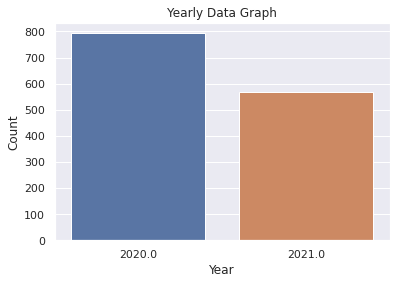

In [39]:
sns.countplot(x='Year', data= merged)
plot.title('Yearly Data Graph')
plot.ylabel('Count')
plot.xlabel('Year')

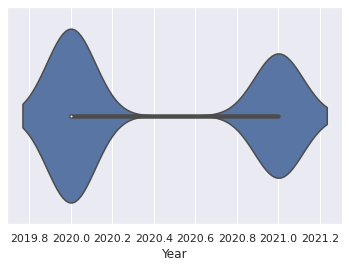

In [40]:
sns.violinplot(x='Year', data= merged)

## Publisher Wise


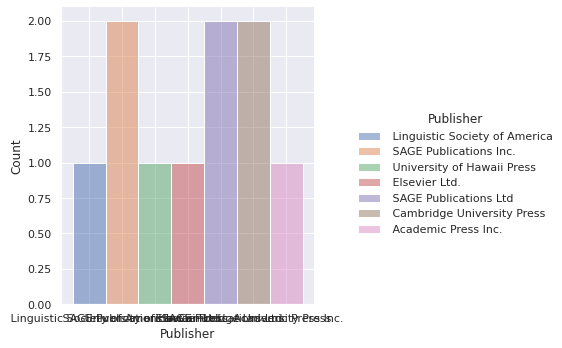

In [60]:
sns.displot(x='Publisher', data=merged.head(10), hue='Publisher')

## Publicaiton Wise

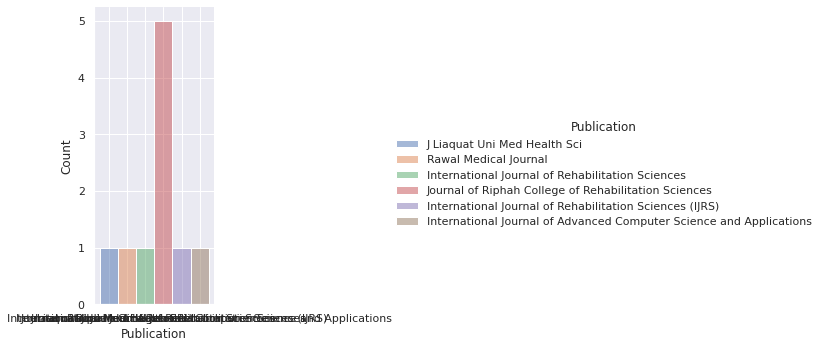

In [63]:
sns.displot( x='Publication', hue='Publication',data=merged.head(10))

## Publication, Year and Subject Name- Plot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


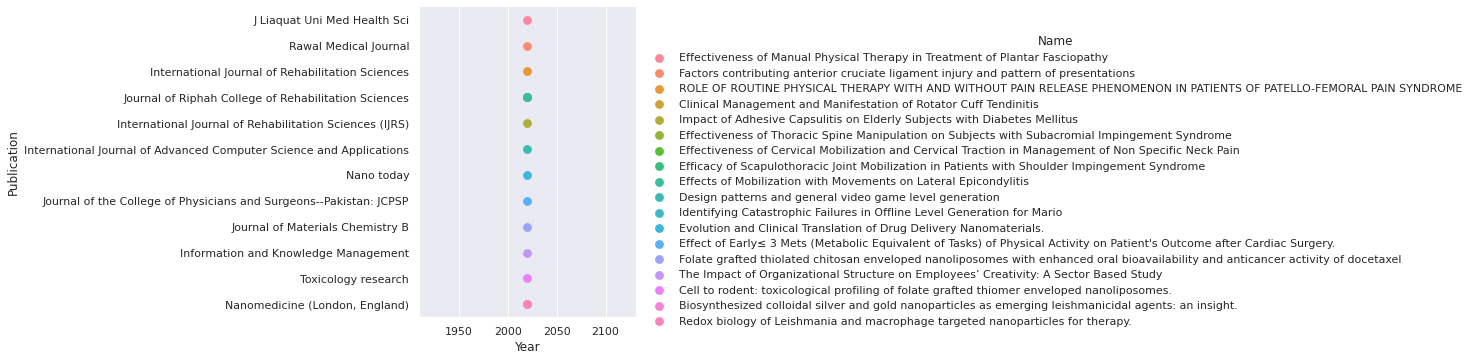

In [34]:
sns.factorplot(x='Year', y='Publication', hue='Name', data=merged.head(20))

## Publication, Year and Subject Name- Correlation

In [74]:
import numpy as np
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr

### Correlation with Pairplot

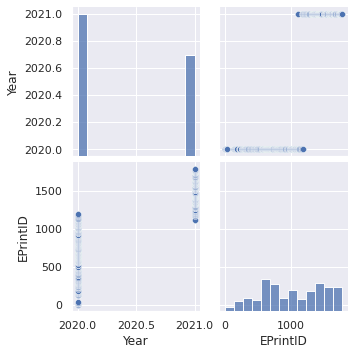

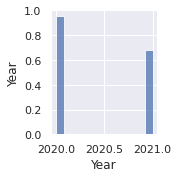

In [65]:
sns.pairplot(merged)

X = merged[['Publication', 'Year', 'Name']]
sns.pairplot(X)

### Correlation with Crosstab

In [72]:
pd.crosstab(merged['Name'], merged['Year'])

Year,2020.0,2021.0
Name,,
"3L: Language, Linguistics, Literature",0,1
AES: Journal of the Audio Engineering Society,1,0
AI and Society,0,1
AILA Review,0,1
AJOB Empirical Bioethics,0,1
...,...,...
Yield response of fodder sorghum (Sorghum bicolor) to seed rate and row spacing under rain-fed conditions,1,0
level of awareness of medical professionals.,1,0
smoke and pollens are precipitating factors for asthma exacerbation,3,0


In [73]:
pd.crosstab(merged['Publication'], merged['Year'])

Year,2020.0,2021.0
Publication,,
ACS Omega,4,0
ACS omega,4,4
AIMS Mathematics,6,2
AIP Advances,0,2
Abasyn Journal of Social Sciences,2,0
...,...,...
journal of Religion and Health,2,0
journal of pakistan medical association,6,0
journal of riphah college of rehabilitation sciences,6,0
